# Nasty Integral

Using MonteCarlo integration, check that

$I = \int_0^{\infty} dx \hspace{0.1 cm}  x^{3}\exp\left(-\frac{x^{2}}{2\sigma^2}\right) = 2\sigma^{4}$

$I = \sqrt{2\pi}\sigma \int_0^{\infty} dx \hspace{0.1 cm} x^3 \mathcal{G}(0,\sigma) \approx \sqrt{2\pi}\sigma \frac{1}{2N}\sum_{i=1}^{N} z_{i}^3$

with $z_i$ sampled from $\mathcal{G(x|0,\sigma)}$ with $x>0$

In [1]:
import numpy as np

In [2]:
sigma = 1 # Standard deviation of the Gaussian distribution

In [4]:
x = np.random.normal(0, sigma, int(1e5)) # sample N points from the Gaussian distribution
x = x[x>0] #take only the positive ones

In [5]:
z = x**3 # Evaluate f(x) in the extracted point x

In [6]:
I = np.sqrt(2*np.pi)*sigma*z.mean()/2 #compute the integral using the mean value theorem

In [7]:
print(I - 2*sigma**4) #Residual of the integral

-0.0034312573337647034


Let's see if the result converges as $N \to \infty$

In [ ]:
Ns = np.power(10, np.linspace(1, 6, 1000))

In [72]:
def compute_integral(N):
    x = np.random.normal(0, sigma, int(N))
    x = x[x>0]
    z = x**3
    return np.sqrt(2*np.pi)*sigma*z.mean()/2

In [73]:
result = [compute_integral(N) for N in Ns]

In [74]:
import sys
sys.path.append(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks")
from Utilities import plot_settings
import matplotlib.pyplot as plt

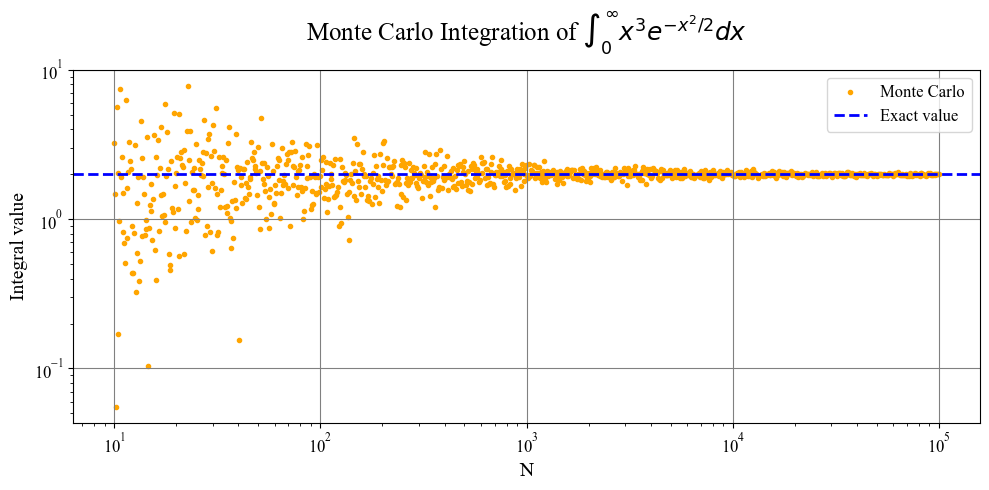

In [75]:
plt.scatter(Ns, result, marker='.', color='orange',label='Monte Carlo')
plt.axhline(2*sigma**4, color='blue', label='Exact value', linestyle='--', linewidth=2)
plt.loglog()
plt.xlabel('N')
plt.ylabel('Integral value')
plt.title('Monte Carlo Integration of $\\int_0^\\infty x^3 e^{-x^2/2} dx$')
plt.legend()

We can see that as the number of extracted numbers increases, the result of the MonteCarlo simulation converges to the real result.\
What happens if we do the computation with a fixed (high) value of extractions for a number of trials and plot the distribution as a function of the number of trials?

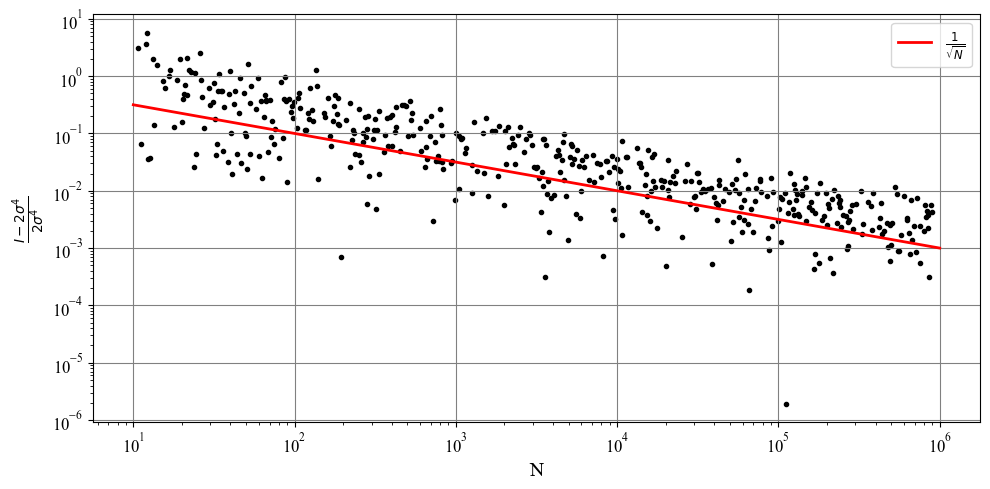

In [24]:
plt.scatter(Ns, (np.array(result) - (2*sigma**4))/(2*sigma**4), marker='.', color='black')
plt.plot(Ns, Ns**-0.5, linewidth=2, color='red', label=r'$\frac{1}{\sqrt{N}}$')
plt.loglog()
plt.xlabel('N')
plt.ylabel(r'$\frac{I - 2\sigma^{4}}{2\sigma^{4}}$')
plt.legend()

Let's see how the distribution of integral values changes as N increases

In [25]:
trials = np.power(10,np.linspace(1, 4, 8))

In [28]:
means, stds, medians, iqrs = [], [], [], []

In [29]:
dist = []
for i, N in enumerate(trials, 1):
    estimates = np.array([compute_integral(int(1e5)) for _ in range(int(N))])
    dist.append(estimates)
    means.append(estimates.mean())
    medians.append(np.median(estimates))
    stds.append(estimates.std())
    q1 = np.percentile(estimates, 25)
    q3 = np.percentile(estimates, 75)
    iqrs.append(q3 - q1)

In [34]:
means = np.array(means)
stds = np.array(stds)
medians = np.array(medians)
iqrs = np.array(iqrs)

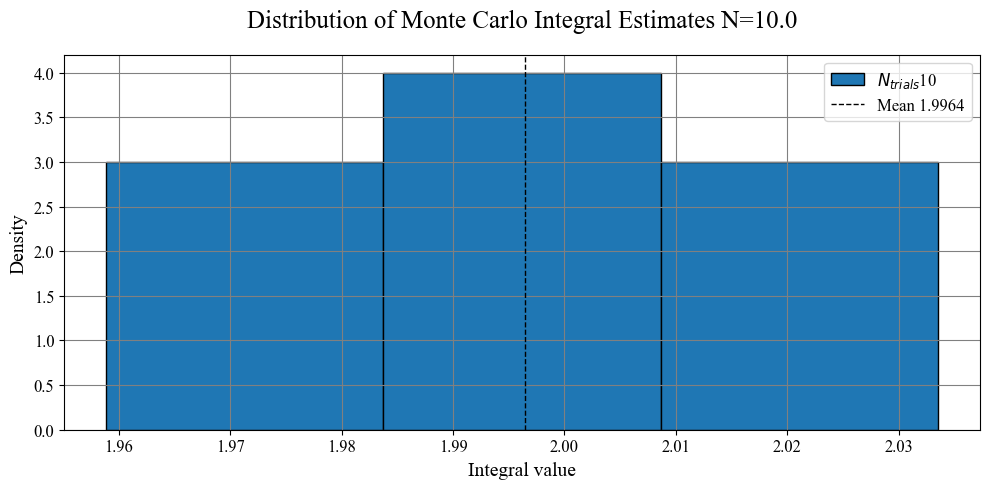

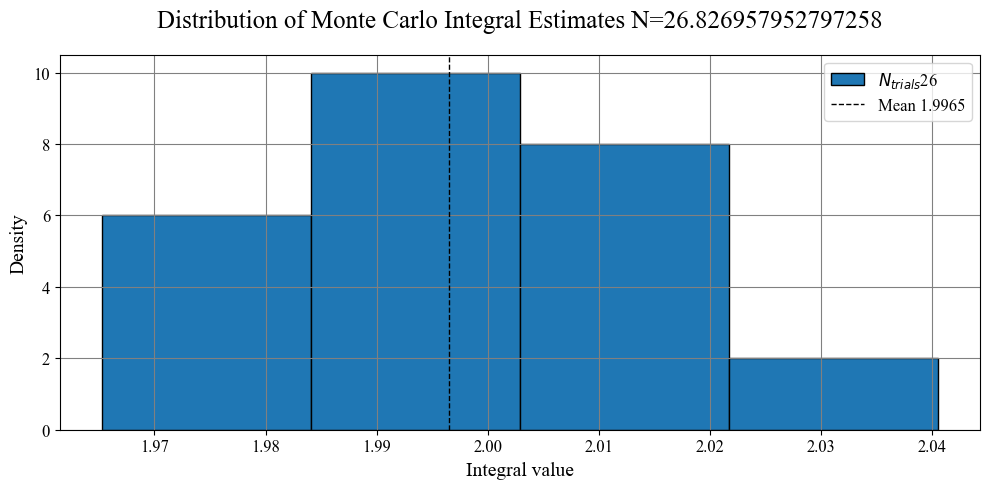

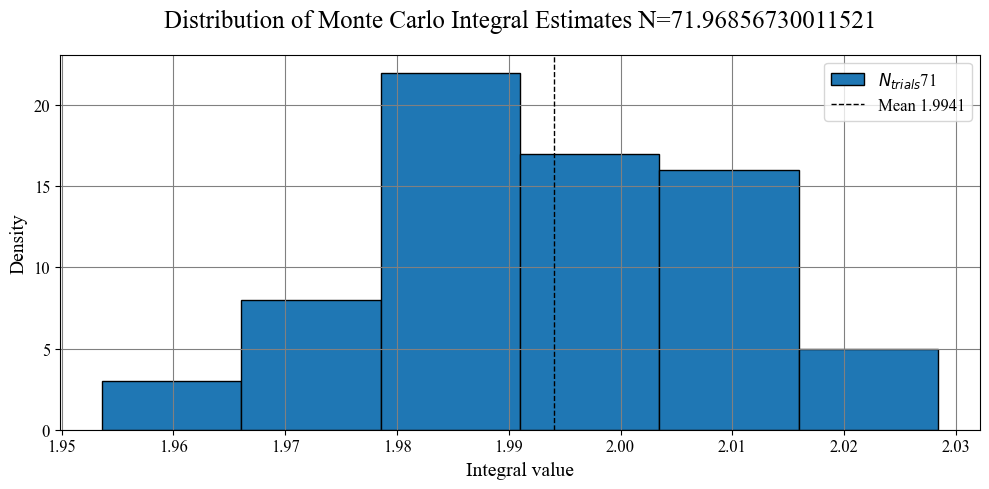

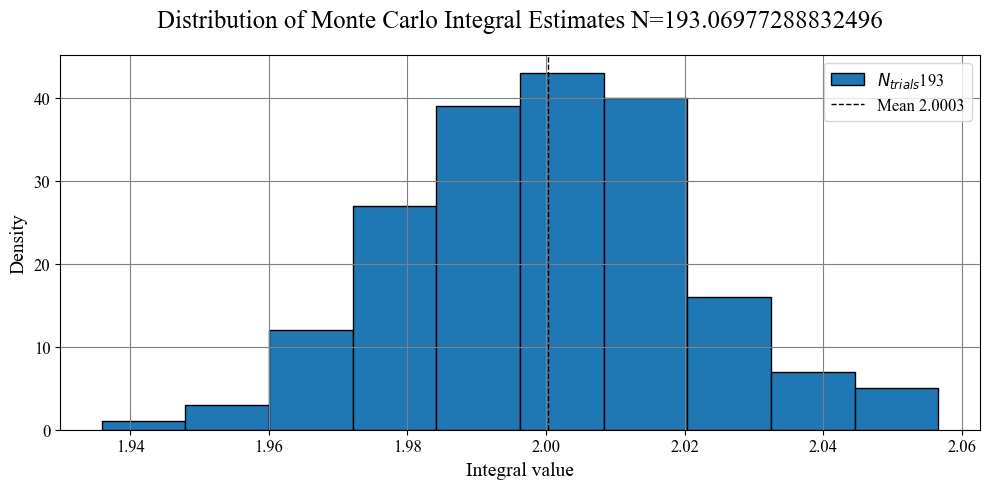

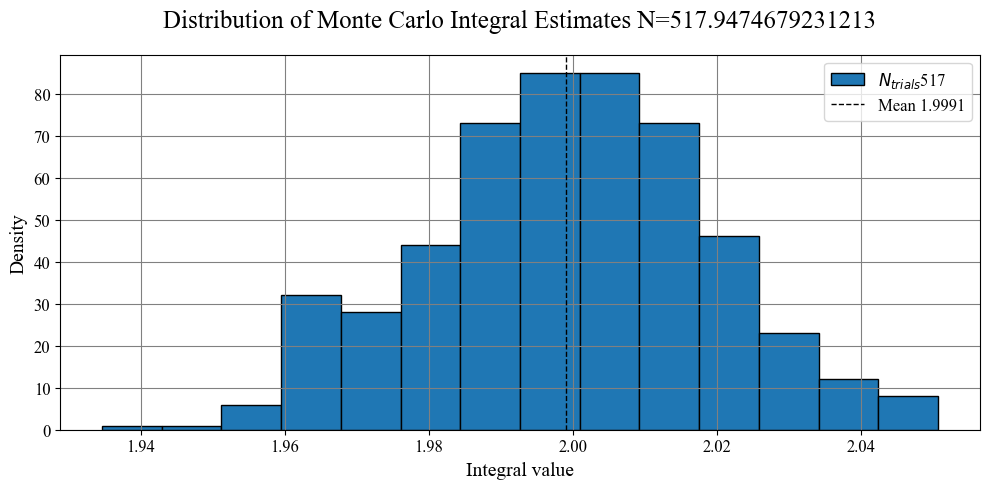

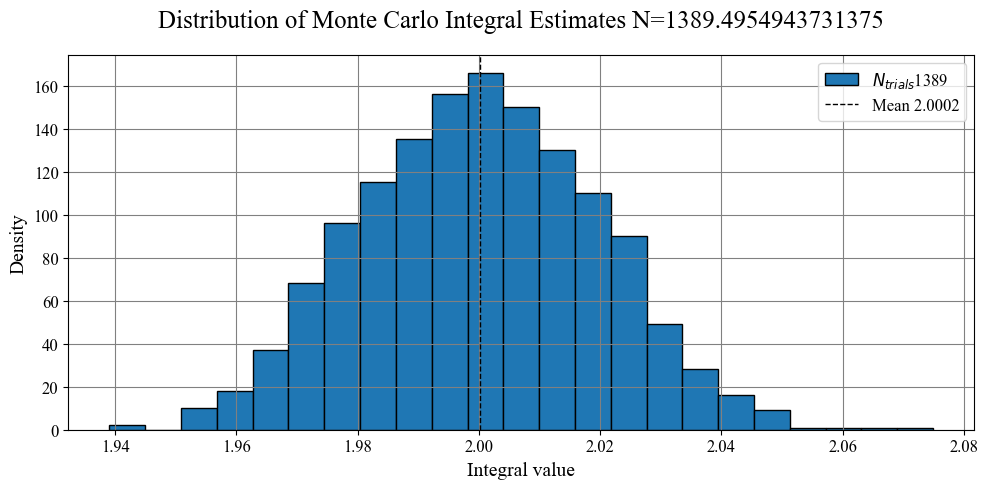

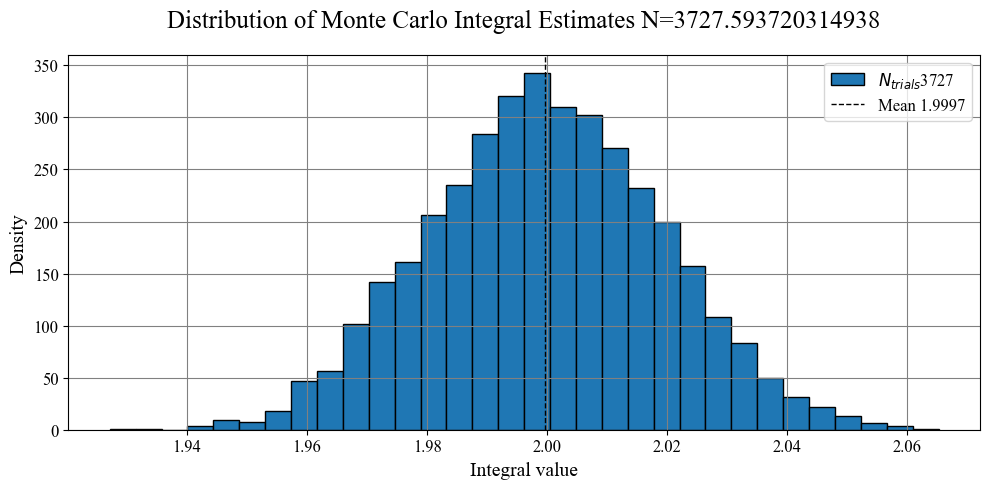

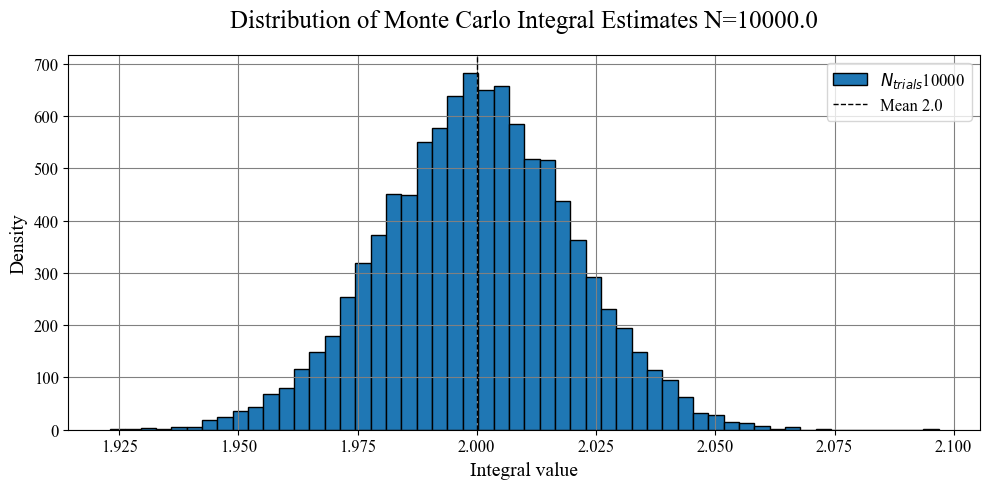

In [47]:
for i,trial in enumerate(trials):
    plt.hist(dist[i], bins='scott', label=r'$N_{trials}$'+f'{int(trial)}', density=False, edgecolor='black')
    plt.axvline(np.mean(dist[i]), color='black', linestyle='--', linewidth=1, label=f'Mean {np.mean(dist[i]):.5}')
    plt.title(f'Distribution of Monte Carlo Integral Estimates N={trial}')
    plt.xlabel('Integral value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

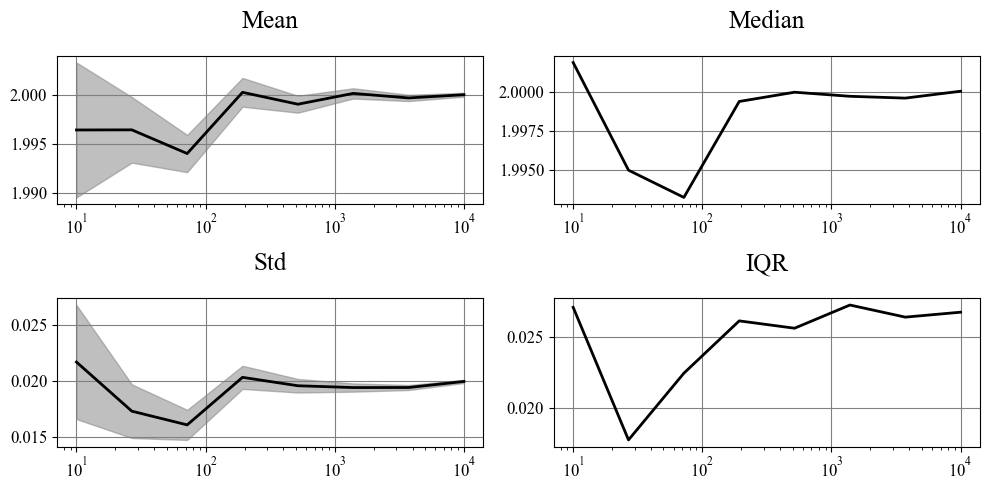

In [64]:
fig, axs = plt.subplots(2,2)

factor = np.sqrt(trials/(2 * trials * (trials - 1)))

axs[0][0].plot(trials, means, lw=2, label='mean', color='k')
axs[0][0].fill_between(trials, means+stds/np.sqrt(trials), means-stds/np.sqrt(trials), color='gray',alpha=0.5)
axs[0][0].set_xscale('log')
axs[0][0].set_title('Mean')
axs[0][1].plot(trials, medians, lw=2, label='median', color='k')
axs[0][1].set_title('Median')
axs[0][1].set_xscale('log')
axs[1][0].plot(trials, stds, lw=2, label='stds', color='k')
axs[1][0].fill_between(trials, stds*(1+factor), stds*(1-factor), color='gray',alpha=0.5)
axs[1][0].set_title('Std')
axs[1][0].set_xscale('log')
axs[1][1].plot(trials, iqrs, lw=2, label='iqrs', color='k')
axs[1][1].set_title('IQR')
axs[1][1].set_xscale('log')

*What if instead of using sample mean and sample variance, I used median and interquantile range to estimate the populatio distribution moments?*\
As shown by the plot above, mean and std are much more efficient estimators, since they converge faster. On the ohter hand median and IQR are more robust to outliers showing less variability.

In [58]:
from scipy.stats import norm

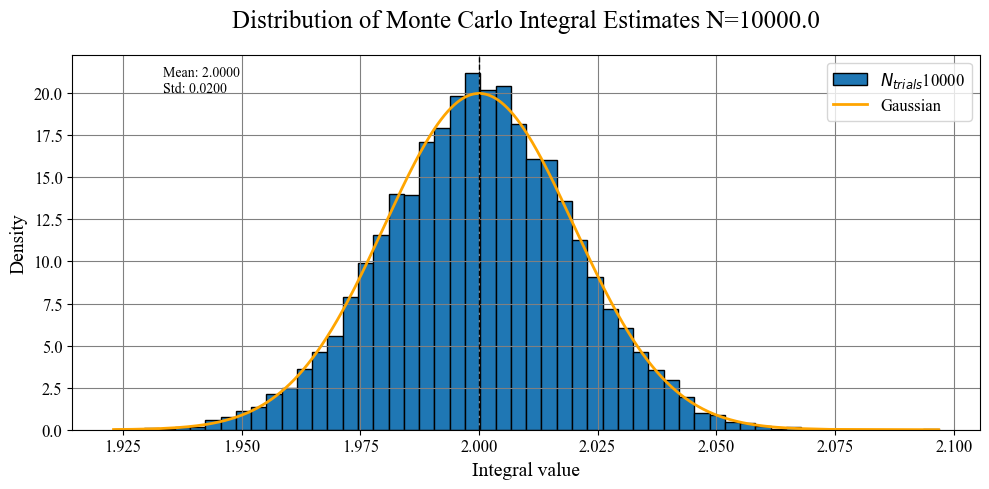

In [61]:
plt.hist(dist[-1], bins='scott', label=r'$N_{trials}$'+f'{int(trial)}', density=True, edgecolor='black')
gauss = norm(loc=means[-1],scale=stds[-1])
plt.plot(np.sort(dist[-1]),gauss.pdf(np.sort(dist[-1])), linewidth=2, color='orange', label='Gaussian')
plt.axvline(np.mean(dist[-1]), color='black', linestyle='--', linewidth=1)
plt.title(f'Distribution of Monte Carlo Integral Estimates N={trial}')
plt.text(0.1, 0.9, f'Mean: {np.mean(dist[i]):.4f}\nStd: {np.std(dist[i]):.4f}', transform=plt.gca().transAxes)
plt.xlabel('Integral value')
plt.ylabel('Density')
plt.legend()
plt.show()

As suggested by the central limit theorem, the distribution of the random variable $X =$"Integral value" tends to become a Gaussian with mean $\mu \to 2$ and standard deviation $\sigma \to 0$